# Spatial Autocorrelation

* [Spatial Lag](#Spatial-Lag)
* [Global autocorrelation](#Global-autocorrelation)
    * [Moran's I](#Moran's-I)
    * [Moran Plot](#Moran-Plot)
    * [Inference](#Global-inference)
* [Local autocorrelation](#Local-autocorrelation)
    * [Local Moran's I](#Local-Moran's-I)
    * [Clusters](#Clusters)
    * [Inference](#Local-inference)
* [Exercises](#Exercises)

In [1]:
%matplotlib inline

import geopandas
import numpy
import pandas
import matplotlib.pyplot as plt
from pysal.lib import weights
from pysal.explore import esda
from pysal.viz.splot import esda as esdaplot

db = geopandas.read_file("../data/lux_regions.gpkg")
w = weights.Queen.from_dataframe(db)
w.transform = "R"

## Spatial Lag

In [2]:
ll_lag = weights.lag_spatial(w, db["light_level"])
pandas.Series(ll_lag).head()

0    1639.250000
1    1016.857143
2    1386.000000
3    2495.000000
4     866.750000
dtype: float64

## Global autocorrelation

### Moran's I

In [3]:
mi = esda.Moran(db["light_level"], w)

### Moran Plot

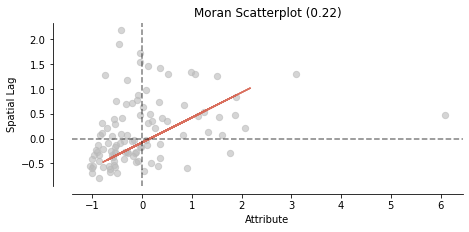

In [4]:
esdaplot.moran_scatterplot(mi);

### Global inference

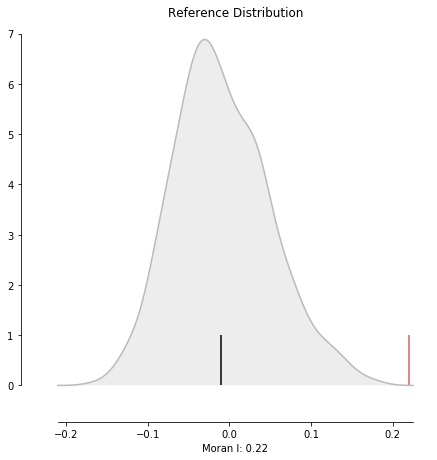

In [5]:
esdaplot.plot_moran_simulation(mi, aspect_equal=False);

## Local autocorrelation

### Local Moran's I

In [6]:
lisa = esda.Moran_Local(db["light_level"], w)

### Clusters

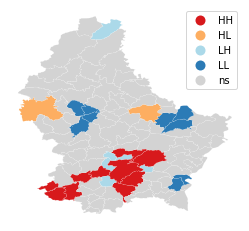

In [7]:
esdaplot.lisa_cluster(lisa, db);

* Putting everything together

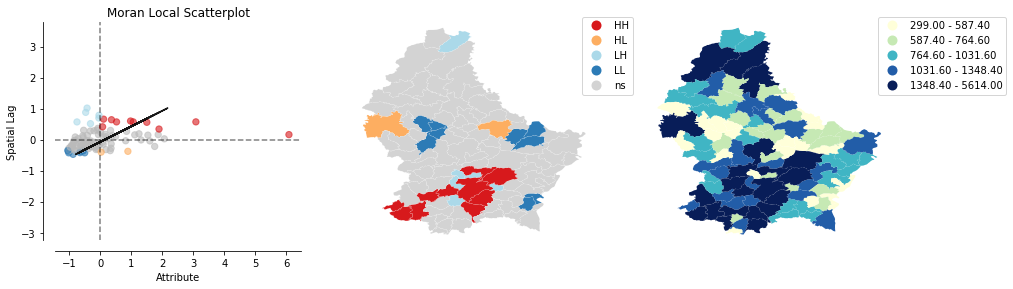

In [8]:
esdaplot.plot_local_autocorrelation(lisa, db, "light_level");

### Local inference

In [9]:
pandas.Series(lisa.p_sim).head()

0    0.061
1    0.458
2    0.143
3    0.014
4    0.215
dtype: float64

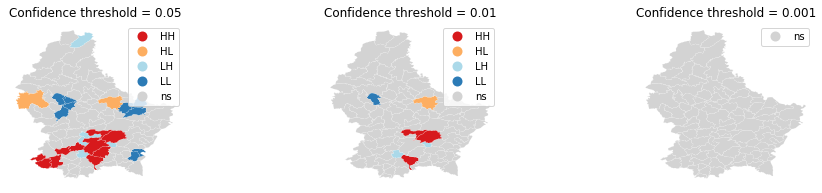

In [10]:
f, axs = plt.subplots(1, 3, figsize=(16, 3))
for i, ax in zip([0.05, 0.01, 0.001], axs):
    esdaplot.lisa_cluster(lisa, db, p=i, ax=ax)
    ax.set_title(f"Confidence threshold = {i}")

## Exercises

* Plot the distribution of values for `light_level` and its spatial lag. How do they relate to each other? What can you say about the lag in comparison to the original variable?
* Compare the results presented above with a similar analysis of `POPULATION`. What are the main similarities and differences?